# 라이브러리 설치

!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install matplotlib

# 관련 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
#import tensorflow as tf
#import keras
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123) # 결과 재현이 가능하도록 시드를 설정합니다.

# 데이터 취합을 위한 파일명 및 파라미터 명 정의

In [2]:
data_dir = "/home/hoseung/Dropbox/DeepInsight/1. Random Forest Tumor Classification/data/"

filenames = ["Bladder", 
             "Breast",
             "Bronchusandlung", 
             "Cervixuteri", 
             "Colon",
             "Corpusuteri", 
             "Kidney", 
             "Liverandintrahepaticbileducts", 
             "Ovary", 
             "Skin", 
             "Stomach"]

variants_ext = "_challenge_variants.txt"

col_Names = ["sampleID", "geneName", "chromosome", "location","mutationType","SNP?","mutationsEffect_1","mutationsEffect_2"]

# 문자형 변수를 숫자형으로 교체하기 위한 함수 정의

In [3]:
# letter2int: 알파벳을 숫자로 변환 (a or A -> 0, b or B -> 1, etc.)
# chromosome2num: X -> 23, Y -> 24

def letter2int(letter):
    out = ord(letter) - 65.
    if out > 25:
        out -= 32.
    return out

def chromosome2num(obj):
    if obj == 'X':
        return 23.
    elif obj == 'Y':
        return 24.
    else:
        return float(obj)    

    

# pandas 모듈을 이용한 원본 데이터 구축 (df0)

In [4]:
df0 = pd.DataFrame(columns=col_Names)

for filename in filenames:
    dataframe = pd.read_csv(data_dir + filename+variants_ext, sep='\t', names = col_Names)
    dataframe['tumorLOC'] = filename
    df0 = pd.concat([df0, dataframe], axis = 0)

del dataframe

In [5]:
df0

,sampleID,geneName,chromosome,location,mutationType,SNP?,mutationsEffect_1,mutationsEffect_2,tumorLOC
0,TCGA-2F-A9KO-01,ABCA12,2,215914405,Missense_Mutation,SNP,deleterious(0),MODERATE,Bladder
1,TCGA-2F-A9KO-01,ABCB4,7,87035681,Missense_Mutation,SNP,deleterious(0.01),MODERATE,Bladder
2,TCGA-2F-A9KO-01,ABCB6,2,220079684,Silent,SNP,.,LOW,Bladder
3,TCGA-2F-A9KO-01,ABCB8,7,150737372,Missense_Mutation,SNP,deleterious(0.03),MODERATE,Bladder
4,TCGA-2F-A9KO-01,ABCD4,14,74753127,3'UTR,SNP,.,MODIFIER,Bladder
...,...,...,...,...,...,...,...,...,...
146761,TCGA-VQ-AA6G-01,ZNF429,19,21719208,Missense_Mutation,SNP,tolerated(0.1),MODERATE,Stomach
146762,TCGA-VQ-AA6G-01,ZNF500,16,4802667,Missense_Mutation,SNP,tolerated(0.07),MODERATE,Stomach
146763,TCGA-VQ-AA6G-01,ZNF598,16,2048486,Missense_Mutation,SNP,.,MODERATE,Stomach
146764,TCGA-VQ-AA6G-01,ZNF623,8,144732057,Silent,SNP,.,LOW,Stomach


# 파라미터 별 변수들을 숫자형으로 변환 및 불필요 항목(sampleID, geneName, chromosome) 제거 -> 데이터 정제

In [6]:
geneNameNum = []
for letter in df0["geneName"].tolist():
    geneNameNum.append(letter2int(letter[0]))

chromosomeNum = []

for letter in df0["chromosome"].tolist():
    chromosomeNum.append(chromosome2num(letter))

df = df0.copy()

df["sampleID"]      = le.fit_transform(df["sampleID"]).astype('float')
df["location"]      = le.fit_transform(df["location"]).astype('float')
df["tumorLOC"]      = le.fit_transform(df["tumorLOC"]).astype('float')
df["geneName"]      = le.fit_transform(df["geneName"]).astype('float')
df["geneNameNum"]   = geneNameNum
df["chromosomeNum"] = chromosomeNum
df["SNP?"]          = le.fit_transform(df["SNP?"]).astype('float')
df["mutationType"]  = le.fit_transform(df["mutationType"]).astype('float')

df["mutationsEffect_1"] = le.fit_transform(df["mutationsEffect_1"]).astype('float')
df["mutationsEffect_2"] = le.fit_transform(df["mutationsEffect_2"]).astype('float')


del df["sampleID"]
del df["geneName"]
del df["chromosome"]

#del df["geneNameNum"]
#del df["chromosomeNum"]
#del df["location"]
#del df["SNP?"]
#del df["mutationType"]
# del df["mutationsEffect_1"]
# del df["mutationsEffect_2"]


# 데이터 정제 결과 (df)

In [7]:
df

,location,mutationType,SNP?,mutationsEffect_1,mutationsEffect_2,tumorLOC,geneNameNum,chromosomeNum
0,1792962.0,9.0,3.0,1.0,2.0,0.0,0.0,2.0
1,1139518.0,9.0,3.0,2.0,2.0,0.0,0.0,7.0
2,1798776.0,13.0,3.0,0.0,1.0,0.0,0.0,2.0
3,1600474.0,9.0,3.0,4.0,2.0,0.0,0.0,7.0
4,1044439.0,1.0,3.0,0.0,3.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...
146761,299440.0,9.0,3.0,18.0,2.0,10.0,25.0,19.0
146762,78680.0,9.0,3.0,15.0,2.0,10.0,25.0,16.0
146763,37542.0,9.0,3.0,0.0,2.0,10.0,25.0,16.0
146764,1568897.0,13.0,3.0,0.0,1.0,10.0,25.0,8.0


# Correlation Cofficient 값을 이용한 데이터 간 상관도 파악

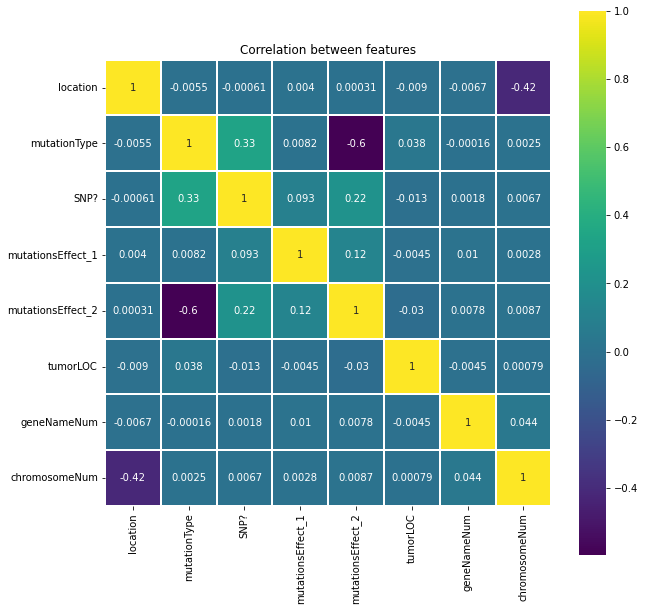

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

# 정제된 데이터(data)를 입력 변수(X) 및 라벨 값(Y)로 분리

In [9]:
data = df.copy()
data_label = np.array(data['tumorLOC'].tolist())
del data['tumorLOC']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, data_label, test_size=0.33, random_state=42)

# 데이터 정규화

In [10]:
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

# RandomForestClassifier 호출 및 하이퍼 파라미터 설정

In [11]:
random_forest = RandomForestClassifier(n_estimators=100)

# 훈련 시작

In [12]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

# 훈련 정확도 계산

In [13]:
print(random_forest.score(X_train, Y_train))

0.9680886092491854


In [14]:
print(random_forest.score(X_test, Y_test))

0.24578397904626098


# 훈련 모델 파라미터 호출

In [19]:
params = random_forest.get_params(True)

In [20]:
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}